# Political Social Media Analysis

In this project, I will try to compare the tweets of Donald Trump, Barrack Obama, and Hillary Clinton to come up with meaningful insights

In this notebook, I will import the cleaned data and come up with as many insights as possible

There are 3 CSV files which will be used:
1. DonaldTrumpClean
2. BarackObamaClean
3. HillaryClintonClean

All 3 have the same structure
date,retweet,text,author

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Read the clean data

In [2]:
trump = pd.read_csv("data/DonaldTrumpClean.csv")
obama = pd.read_csv("data/BarackObamaClean.csv")
clinton = pd.read_csv("data/HillaryClintonClean.csv")

In [3]:
print(len(trump), len(obama), len(clinton))

8439 2125 3256


In [4]:
trump['date'] = pd.to_datetime(trump['date'])
obama['date'] = pd.to_datetime(obama['date'])
clinton['date'] = pd.to_datetime(clinton['date'])

### Insight 1: Analysis of how active each of them are

Time frame for the dataset is 01-01-2014 to 13-10-2016

Text(0,0.5,'Tweets')

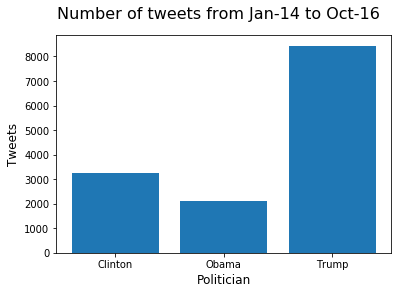

In [5]:
xpos = ["Trump", "Obama", "Clinton"]
ypos = [len(trump), len(obama), len(clinton)]
plt.bar(xpos, ypos)

title = "Number of tweets from Jan-14 to Oct-16"
plt.suptitle(title, fontsize=16)
plt.xlabel("Politician", fontsize=12)
plt.ylabel("Tweets", fontsize=12)

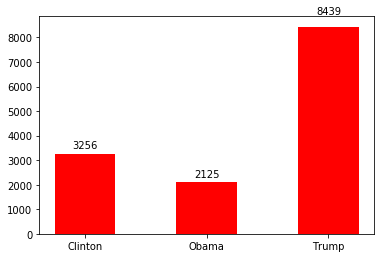

In [6]:
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(3,4))

rects1 = ax.bar(xpos, ypos, width, color='r')
title = "Number of tweets from Jan-14 to Oct-16"


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
autolabel(rects1)

plt.suptitle(title)
plt.show()

### Time series of number of tweets every quarter

In [7]:
trump_copy = trump.copy()
obama_copy = obama.copy()
clinton_copy = clinton.copy()

trump_copy['quarters'] = trump_copy.date.dt.quarter + (trump_copy.date.dt.year - 2014)*4
obama_copy['quarters'] = obama_copy.date.dt.quarter + (obama_copy.date.dt.year - 2014)*4
clinton_copy['quarters'] = clinton_copy.date.dt.quarter + (clinton_copy.date.dt.year - 2014)*4

In [8]:
trump_copy['quarters'] = trump_copy['quarters'].astype(int)
obama_copy['quarters'] = obama_copy['quarters'].astype(int)
clinton_copy['quarters'] = clinton_copy['quarters'].astype(int)

In [9]:
trumpQuartCount = trump_copy.groupby(['quarters'])['text'].count()
obamaQuartCount = obama_copy.groupby(['quarters'])['text'].count()
clintonQuartCount = clinton_copy.groupby(['quarters'])['text'].count()

In [10]:
trumpQuartCount.drop(12, inplace=True)
clintonQuartCount.drop(12, inplace=True)
obamaQuartCount.drop(12, inplace=True)

In [11]:
#Since clinton has no data for 2014, we will add those quarters to have 0 tweets
for i in range(1,5):
    clintonQuartCount[i] = 0 
clintonQuartCount.sort_index(inplace=True)

In [12]:
quarters = ['2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', 
           '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4',
           '2016-Q1', '2016-Q2', '2016-Q3']

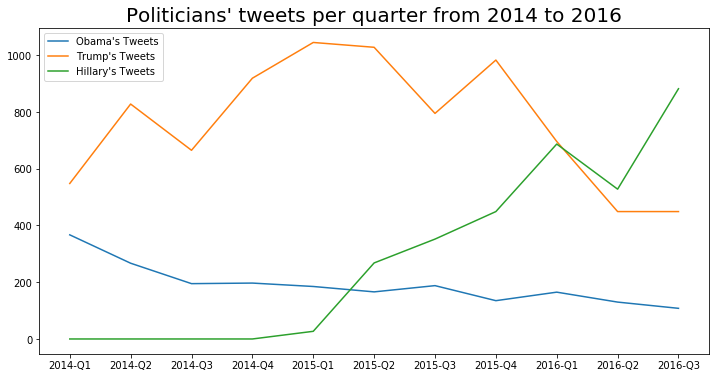

In [13]:
plt.figure(figsize=(12, 6))  # width:20, height:6
plt.title("Politicians' tweets per quarter from 2014 to 2016", fontsize=20)
plt.plot(quarters, obamaQuartCount)
plt.plot(quarters, trumpQuartCount)
plt.plot(quarters, clintonQuartCount)

plt.legend(['Obama\'s Tweets', 'Trump\'s Tweets', 'Hillary\'s Tweets'], loc='upper left')
plt.show()

## Creating wordclouds

Now we'll be creating wordclouds to have a rough gauge of the most frequently used words by the different politicians before we go into analysing the sentiments

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageFilter

In [41]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [42]:
trump_mask = np.array(Image.open("images/trump.png"))
# Transform your mask into a new one that will work with the function:
transformed_trump_mask = np.ndarray((trump_mask.shape[0],trump_mask.shape[1]), np.int32)

for i in range(len(trump_mask)):
    transformed_trump_mask[i] = list(map(transform_format, trump_mask[i]))
    
stopwords = set(STOPWORDS)
stopwords.update(["realDonaldTrump", "@realDonaldTrump", "Donald", "Trump"])
trumpTweets = " ".join(tweet for tweet in trump.text)

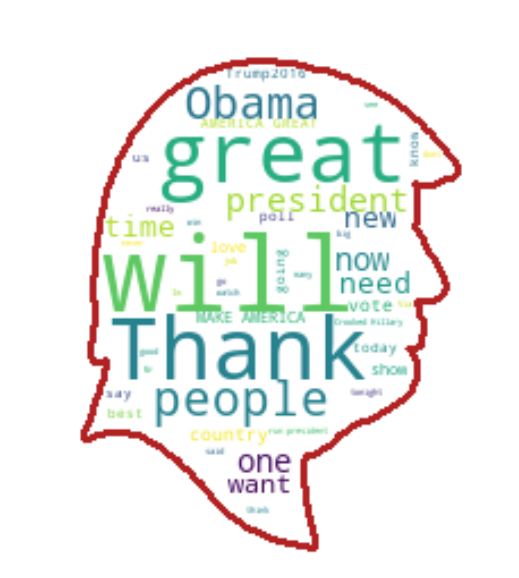

In [43]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_trump_mask,
               stopwords=stopwords, contour_width=3, contour_color = "firebrick")

# Generate a wordcloud
wc.generate(trumpTweets)

# store to file
wc.to_file("images/trumpWordcloud.png")

# show
plt.figure(figsize=[20,10], edgecolor='black')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In this Trump-shaped Wordcloud, we can see that the most common words Trump uses are `Thank`, `will`, `great` etc.

Unsurprisingly, he uses `Obama` a lot as well

In [68]:
obama_mask = np.array(Image.open("images/obama.png"))
# Transform your mask into a new one that will work with the function:
transformed_obama_mask = np.ndarray((obama_mask.shape[0],obama_mask.shape[1]), np.int32)

for i in range(len(obama_mask)):
    transformed_obama_mask[i] = list(map(transform_format, obama_mask[i]))
    
stopwords = set(STOPWORDS)
stopwords.update(["President", "Obama", "President Obama", "bo", "ofa"])
obamaTweets = " ".join(tweet for tweet in obama.text)

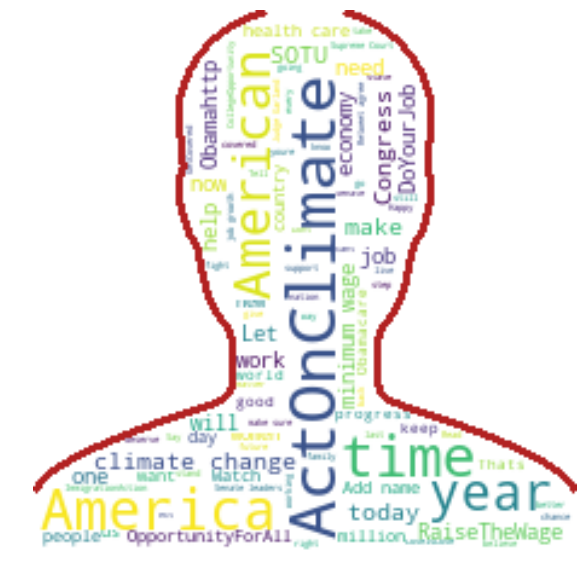

In [69]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000,
               stopwords=stopwords, mask=transformed_obama_mask,
               contour_width=3, contour_color = "firebrick")

# Generate a wordcloud
wc.generate(obamaTweets)

# store to file
wc.to_file("images/obamaWordcloud.png")

# show
plt.figure(figsize=[20,10], edgecolor='black')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In this Obama-shaped wordcloud, we can see that he refers to `America` a lot and talks about `Climate change` a lot

In [81]:
stopwords = set(STOPWORDS)
stopwords.update(["Hillary", "twitter", "https", "hrc", "io"])
clintonTweets = " ".join(tweet for tweet in clinton.text)

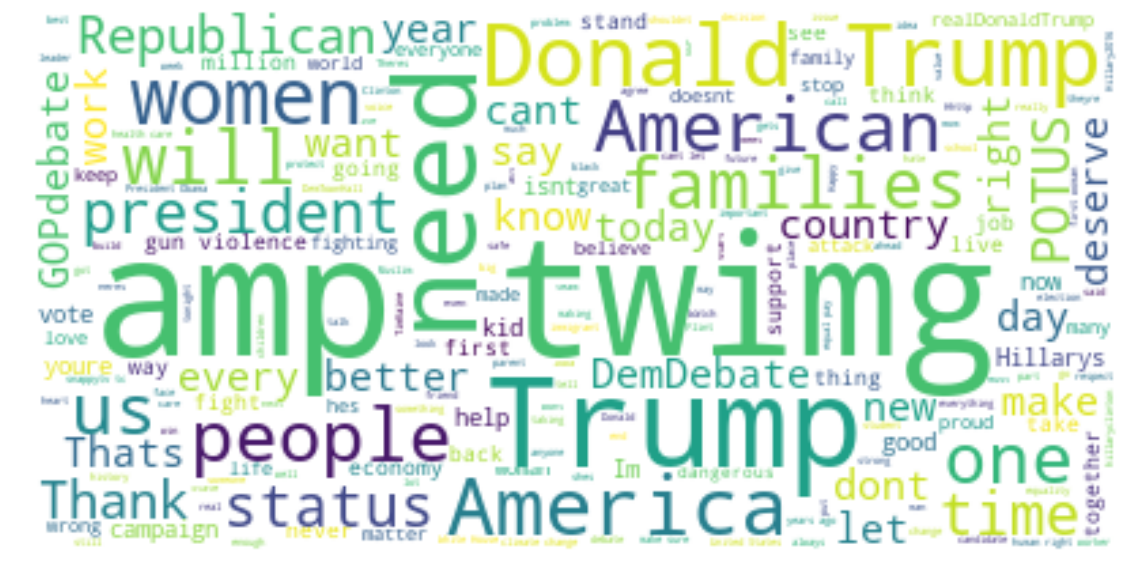

In [82]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, stopwords=stopwords)

# Generate a wordcloud
wc.generate(clintonTweets)

# store to file
wc.to_file("images/clintonWordcloud.png")

# show
plt.figure(figsize=[20,10], edgecolor='black')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In this wordcloud, we can see that she refers to `Donald Trump` a lot in her tweets!